# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Saya menggunakan dataset dari Kaggle yaitu Exam Score Prediction. url: https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset?resource=download kemudian menyimpannya di Google Drive pribadi.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from IPython.display import display

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_Exam_Score_Prediction/Exam_Score_Prediction.csv')
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [4]:
print(f"Dataset Shape: {df.shape}")
print("\nDataset Info: ")
df.info()

Dataset Shape: (20000, 13)

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Definisikan kolom untuk EDA dan Preprocessing
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']
nominal_cols = ['gender', 'course', 'internet_access', 'study_method']
ordinal_cols = ['sleep_quality', 'facility_rating', 'exam_difficulty']
numerical_cols_to_scale = numerical_cols.copy()

**A. Missing Value & Duplication**

In [6]:
missing = df.isnull().sum()
duplicated = df.duplicated().sum()
print(f"Jumlah nilai kosong : \n{missing} ")
print(f"\nJumlah duplikasi: {duplicated} ")

Jumlah nilai kosong : 
student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64 

Jumlah duplikasi: 0 


**Note: Data yang saya miliki dari dataset tersebut sudah bersih dari nilai kosong dan duplikasi**

**B. Data Distribution & Value Counting**

1. Distribution Target Column

In [7]:
# melihat distribusi kolom exam score (variabel target)
print("Statistik 'exam_score' :\n")
exam_score_desc = df['exam_score'].describe()
print(exam_score_desc.to_markdown(numalign="left", stralign="left"))

# melihat frekuensi nilai exam difficulty
print("\nNilai 'exam_difficulty' :\n")
print(df['exam_difficulty'].value_counts())

Statistik 'exam_score' :

|       | exam_score   |
|:------|:-------------|
| count | 20000        |
| mean  | 62.5132      |
| std   | 18.9085      |
| min   | 19.599       |
| 25%   | 48.8         |
| 50%   | 62.6         |
| 75%   | 76.3         |
| max   | 100          |

Nilai 'exam_difficulty' :

exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


2. Frekuensi Kategorikal

In [8]:
# melihat frekuensi nilai fitur kategorikal yang ordinal
ordinal_cols = ['sleep_quality', 'facility_rating', 'exam_difficulty']

for col in ordinal_cols:
    print(f"\nFrekuensi nilai unik untuk kolom: {col}:\n")
    value_counts = df[col].value_counts()
    print(value_counts.to_markdown(numalign="left", stralign="left"))


Frekuensi nilai unik untuk kolom: sleep_quality:

| sleep_quality   | count   |
|:----------------|:--------|
| average         | 6694    |
| poor            | 6687    |
| good            | 6619    |

Frekuensi nilai unik untuk kolom: facility_rating:

| facility_rating   | count   |
|:------------------|:--------|
| medium            | 6760    |
| low               | 6638    |
| high              | 6602    |

Frekuensi nilai unik untuk kolom: exam_difficulty:

| exam_difficulty   | count   |
|:------------------|:--------|
| moderate          | 9878    |
| easy              | 6141    |
| hard              | 3981    |


**C. Numerik Correlation Matrix**


Numerik Correlation Matrix :



Text(0.5, 1.0, 'Heatmap Korelasi Fitur Numerik')

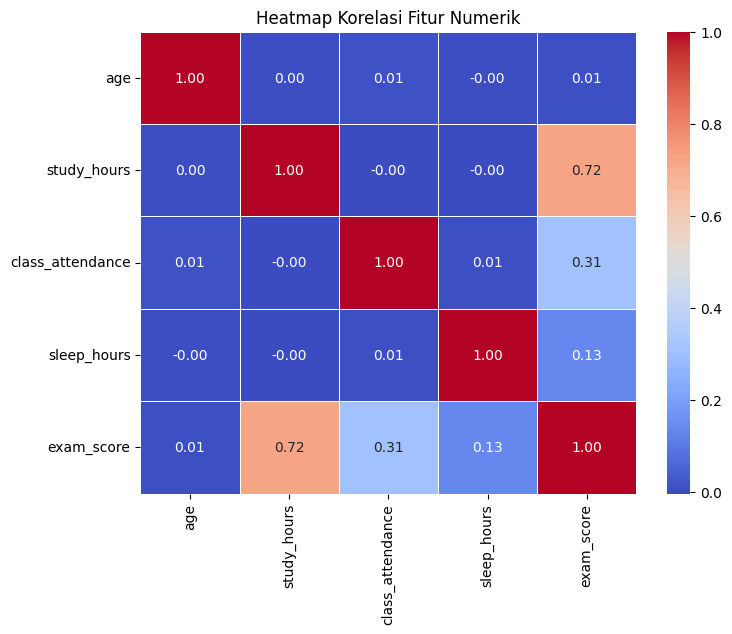

In [9]:
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
correlation_matrix = df[numerical_cols].corr()

# visualisasi
print("\nNumerik Correlation Matrix :\n")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Fitur Numerik')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**Note: Untuk langkah 1 dan 2 tidak saya lakukan karena data yang saya miliki sudah bersih**

**A. Outlier Detection**

Deteksi dan Visualisasi Outlier pada Fitur Numerik:


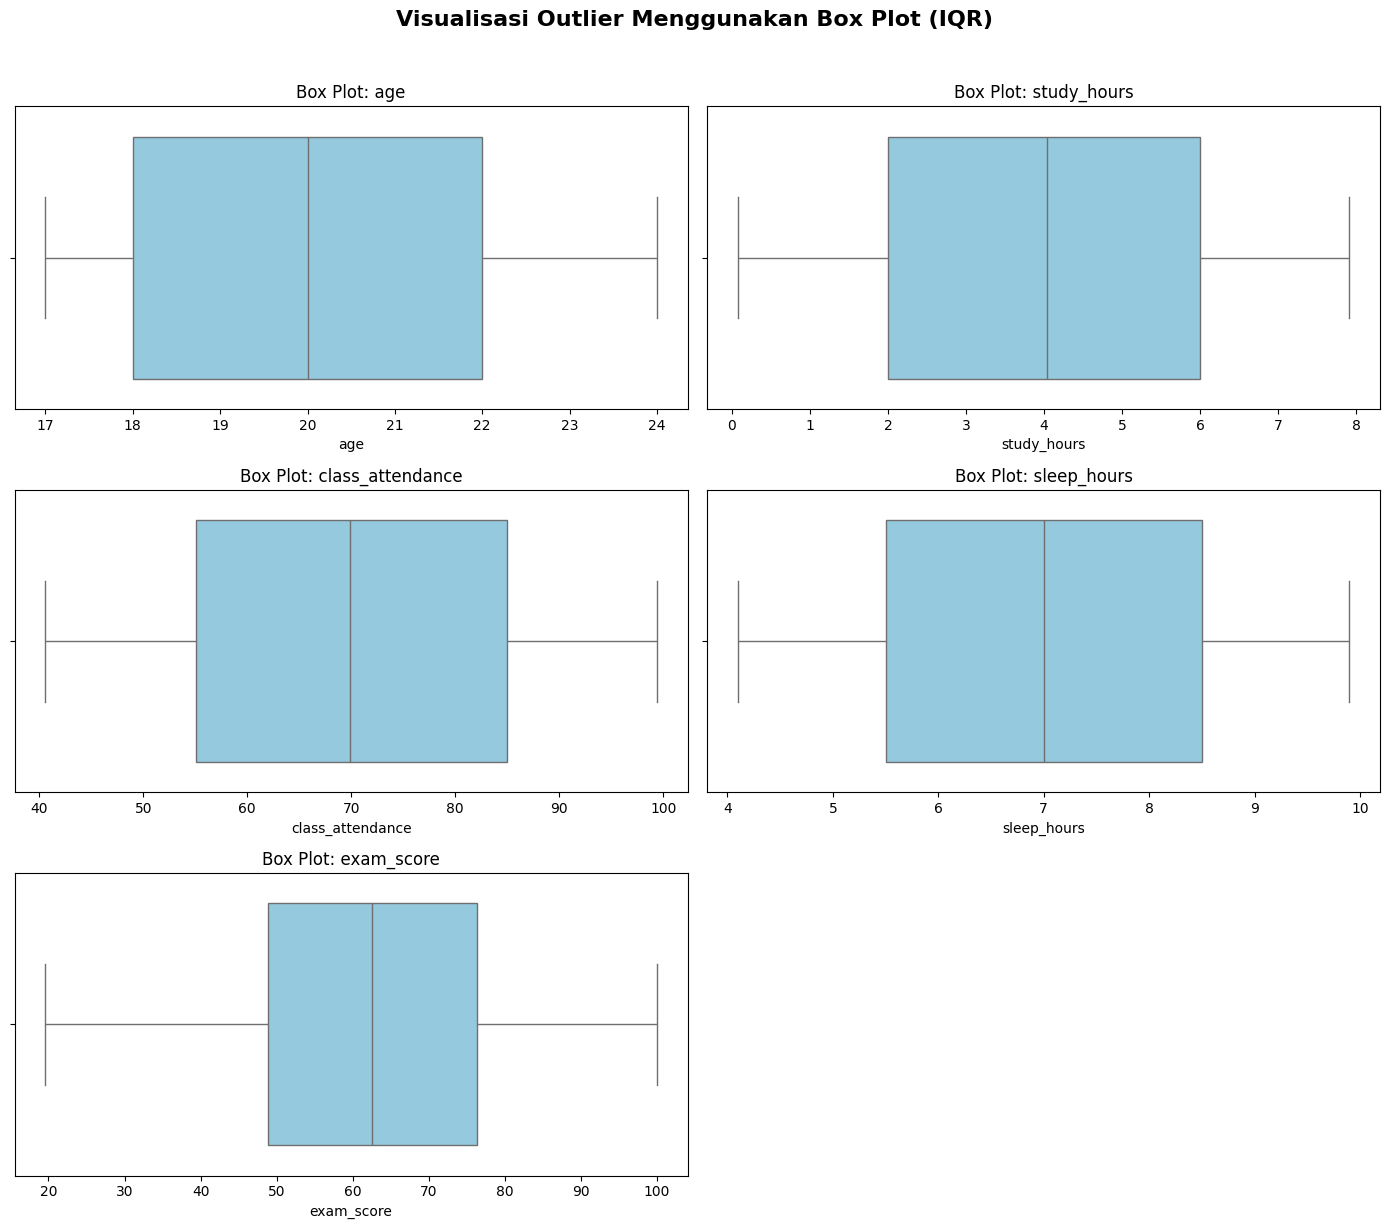

In [10]:
# A. Outlier Detection: Visualisasi Fitur Numerik

print("Deteksi dan Visualisasi Outlier pada Fitur Numerik:")

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12))
plt.suptitle('Visualisasi Outlier Menggunakan Box Plot (IQR)', y=1.02, fontsize=16, weight='bold')
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot: {col}', fontsize=12)
    axes[i].set_xlabel(col)

for j in range(len(numerical_cols), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Note: Data yang saya gunakan terlihat sudah bersih tanpa outlier**

**B. Capping & Binning**

In [11]:
# B. Capping & Binning

df_target = df.drop(columns=['student_id']).copy()

# 1. Capping
col_outlier = 'exam_score'
Q1 = df_target[col_outlier].quantile(0.25)
Q3 = df_target[col_outlier].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_target[col_outlier] = df_target[col_outlier].clip(lower=lower_bound, upper=upper_bound)

# 2. Lakukan K-Means pada target (exam_score yang sudah di-capping)
K = 4
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_target[['exam_score']].values)

df_target['Score_Bin'] = kmeans.labels_

# Mapping: Urutkan cluster berdasarkan rata-rata exam_score (Logika Automate)
cluster_means = df_target.groupby('Score_Bin')['exam_score'].mean().sort_values()
cluster_map = {old_label: new_label for new_label, old_label in enumerate(cluster_means.index)}

df_target['Score_Bin_Mapped'] = df_target['Score_Bin'].map(cluster_map).astype(int)

print("Capping Outlier dan K-Means Binning Selesai.")
print("Kolom Target Klasifikasi ('Score_Bin_Mapped') berhasil dibuat.")

# Simpan kolom target yang sudah dimapping untuk digabungkan nanti
target_mapped = df_target[['Score_Bin_Mapped']].copy()

Capping Outlier dan K-Means Binning Selesai.
Kolom Target Klasifikasi ('Score_Bin_Mapped') berhasil dibuat.


**C. Encoding**

1. Ordinal Encoding

In [12]:
# C.1. Ordinal Encoding

# Buat dataframe baru dan hapus komo ID & target
df_processed = df.drop(columns=['student_id', 'exam_score']).copy()

# Mapping Kategori Ordinal
ordinal_mapping = {
    'sleep_quality': {'poor': 0, 'average': 1, 'good': 2},
    'facility_rating': {'low': 0, 'medium': 1, 'high': 2},
    'exam_difficulty': {'easy': 0, 'moderate': 1, 'hard': 2}
}
for col, mapping in ordinal_mapping.items():
    df_processed[col] = df_processed[col].replace(mapping)

print("Ordinal Encoding Selesai.")
display(df_processed[ordinal_cols].head())

Ordinal Encoding Selesai.


/tmp/ipython-input-1229656166.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed[col] = df_processed[col].replace(mapping)


,sleep_quality,facility_rating,exam_difficulty
0,0,0,2
1,1,1,1
2,0,2,1
3,1,0,1
4,0,0,1


2. One-Hot Encoding

In [13]:
# C.2. One-Hot Encoding

# One-Hot pada df_processed yang sudah di-Ordinal Encoding
df_final = pd.get_dummies(df_processed, columns=nominal_cols, drop_first=True, dtype=int)

print(f"\nOne-Hot Encoding Selesai. Data shape setelah encoding: {df_final.shape}")
display(df_final[[col for col in df_final.columns if 'gender' in col or 'course' in col]].head())


One-Hot Encoding Selesai. Data shape setelah encoding: (20000, 20)


,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma
0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


**D. Scaling & Merge Target**

In [14]:
# D. Scaling Numerik & Merge Target

# 1. Scaling Numerik
scaler = StandardScaler()
df_final[numerical_cols_to_scale] = scaler.fit_transform(df_final[numerical_cols_to_scale])

print("Scaling Numerik Selesai.")

# 2. Merge Target
df_final['Score_Bin_Mapped'] = target_mapped['Score_Bin_Mapped']

print("\nRingkasan Data Akhir Preprocessing:")
print(f"Dimensi Akhir Data Preprocessing: {df_final.shape}\n")
print("Data Hasil Preprocessing:")

display_cols = numerical_cols_to_scale + ['sleep_quality', 'gender_male', 'course_bca', 'Score_Bin_Mapped']
display(df_final[display_cols].head())

Scaling Numerik Selesai.

Ringkasan Data Akhir Preprocessing:
Dimensi Akhir Data Preprocessing: (20000, 21)

Data Hasil Preprocessing:


,age,study_hours,class_attendance,sleep_hours,sleep_quality,gender_male,course_bca,Score_Bin_Mapped
0,-1.520442,-0.531832,1.324086,0.225999,0,1,0,1
1,1.106067,-0.276227,-0.301899,-1.390586,1,0,1,1
2,0.668315,1.677629,0.392472,0.861085,0,1,0,3
3,-0.207188,-1.445942,-1.250872,-0.697764,1,0,0,0
4,-0.207188,-1.350632,0.091578,1.611643,0,0,0,0


**E. Train-Test Split**

In [16]:
X = df_final.drop(columns=['Score_Bin_Mapped'])
y = df_final['Score_Bin_Mapped']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Proporsi Target di y_train:\n{y_train.value_counts(normalize=True).sort_index().to_markdown(numalign='left', stralign='left')}")

X_train shape: (16000, 20)
X_test shape: (4000, 20)
Proporsi Target di y_train:
| Score_Bin_Mapped   | proportion   |
|:-------------------|:-------------|
| 0                  | 0.187562     |
| 1                  | 0.315375     |
| 2                  | 0.312563     |
| 3                  | 0.1845       |
